# Performance comparaison

| Fingerprint | R2 | RMSE |  
|:-:|:-:|:-:|  
| ECFP| 0.765 | 0.9808 |
|Can2Can|0.7176|1.073|
| NFP| 0.8845 | 0.6868 |

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import MACCSkeys, AllChem

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
scores_ecfp4=[
{'r2 mean': -0.1182601549079639, 'r2 std': 0.38492231932689197, 'rmse mean': 1.7046461962569939, 'rmse std': 0.064028737168511},
{'r2 mean': 0.4200801070248882, 'r2 std': 0.056323869062615314, 'rmse mean': 1.5330984002474106, 'rmse std': 0.058330132808446886},
{'r2 mean': 0.5142260496738709, 'r2 std': 0.03488870888296532, 'rmse mean': 1.4796416953603162, 'rmse std': 0.04998929662590407},
{'r2 mean': 0.5517382840343468, 'r2 std': 0.04070523389695399, 'rmse mean': 1.4144024916614077, 'rmse std': 0.06294831164905162},
{'r2 mean': 0.6020391672882388, 'r2 std': 0.07006047612774513, 'rmse mean': 1.3241745714040831, 'rmse std': 0.10213747489123697}
]
scores_st = [
{'r2 mean': 0.6571610303680655, 'r2 std': 0.032572135933967246, 'rmse mean': 1.147067002227973, 'rmse std': 0.05359295019205026},
{'r2 mean': 0.696297613698292, 'r2 std': 0.040835502554000466, 'rmse mean': 1.0106739136248548, 'rmse std': 0.045704741851971334},
{'r2 mean': 0.690534623260907, 'r2 std': 0.06184343517089181, 'rmse mean': 1.0172932433069881, 'rmse std': 0.06902758468519067},
{'r2 mean': 0.716188339332361, 'r2 std': 0.04877404249436462, 'rmse mean': 0.9775043363906827, 'rmse std': 0.06428197359798228},
{'r2 mean': 0.6771786600248746, 'r2 std': 0.08891697359012948, 'rmse mean': 1.0246648545711594, 'rmse std': 0.12569763189365132}
]
scores_gae=[
{'r2 mean': 0.28032776829694683, 'r2 std': 0.09340462615634937, 'rmse mean': 1.8550083625098572, 'rmse std': 0.2024013609462288},
{'r2 mean': 0.4908138859485501, 'r2 std': 0.05497909175167818, 'rmse mean': 1.544493428107669, 'rmse std': 0.08323523501302978},
{'r2 mean': 0.5626690071994529, 'r2 std': 0.0630935820731443, 'rmse mean': 1.3787549595351156, 'rmse std': 0.21300371475203592},
{'r2 mean': 0.6014172466286762, 'r2 std': 0.046772183356212006, 'rmse mean': 1.2658116057443871, 'rmse std': 0.0789094833288315},
{'r2 mean': 0.5749047753758626, 'r2 std': 0.09812030893474082, 'rmse mean': 1.1741714935099299, 'rmse std': 0.08498478319827273}
]
scores_gc = [
{'r2 mean': 0.21890250990726204, 'r2 std': 0.07381879126556154, 'rmse mean': 1.8429856337306183, 'rmse std': 0.08739237277147067},
{'r2 mean': 0.5563064786186135, 'r2 std': 0.07246171936294994, 'rmse mean': 1.3880360761230484, 'rmse std': 0.1161028613690809},
{'r2 mean': 0.6608510694945265, 'r2 std': 0.06851655478404685, 'rmse mean': 1.2253566948338137, 'rmse std': 0.12372734445062651},
{'r2 mean': 0.7561302082858733, 'r2 std': 0.054626548782266596, 'rmse mean': 1.0387756727933906, 'rmse std': 0.12601494762902174},
{'r2 mean': 0.8148924716400823, 'r2 std': 0.03176142362012494, 'rmse mean': 0.8677234443263296, 'rmse std': 0.09109165427656797}
]

In [3]:
r = np.arange(0.1, 1, 0.2)

In [4]:
def dict_to_arr(scores_dict):
    r2, rmse = np.empty((2,len(scores_ecfp4))), np.empty((2,len(scores_ecfp4)))
    for i,s in enumerate(scores_dict):
        r2[0,i] = s['r2 mean']
        r2[1,i] = s['r2 std']
        rmse[0,i] = s['rmse mean']
        rmse[1,i] = s['rmse std']
    return r2, rmse
    

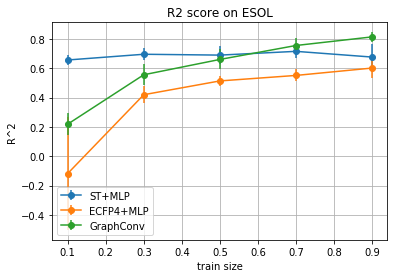

In [13]:
plt.figure(figsize=(6,4))
r2_1, rmse_1 = dict_to_arr(scores_ecfp4)
r2_2, rmse_2 = dict_to_arr(scores_st)
r2_3, rmse_3 = dict_to_arr(scores_gae)
r2_4, rmse_4 = dict_to_arr(scores_gc)
plt.errorbar(r, r2_2[0], yerr=r2_2[1], fmt='o-', label='ST+MLP')
plt.errorbar(r, r2_1[0], yerr=r2_1[1], fmt='o-', label='ECFP4+MLP')
#plt.errorbar(r, r2_3[0], yerr=r2_3[1], fmt='o-', label='GAE+MLP')
plt.errorbar(r, r2_4[0], yerr=r2_4[1], fmt='o-', label='GraphConv')
plt.xlabel('train size')
plt.ylabel('R^2')
plt.title('R2 score on ESOL')
plt.legend()
plt.grid()
plt.show()

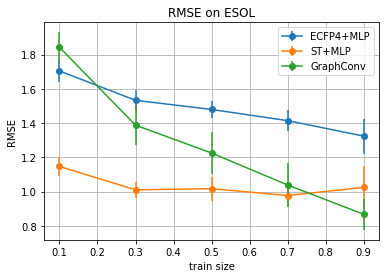

In [13]:

plt.errorbar(r, rmse_1[0], yerr=rmse_1[1], fmt='o-', label='ECFP4+MLP')
plt.errorbar(r, rmse_2[0], yerr=rmse_2[1], fmt='o-', label='ST+MLP')
#plt.errorbar(r, rmse_3[0], yerr=rmse_3[1], fmt='o-', label='GAE+MLP')
plt.errorbar(r, rmse_4[0], yerr=rmse_4[1], fmt='o-', label='GraphConv')
plt.xlabel('train size')
plt.ylabel('RMSE')
plt.title('RMSE on ESOL')
plt.legend()
plt.grid()
plt.show()

In [7]:
X1 = [
[0.49014492, 0.01986358],
[0.4883367,  0.02578929],
[0.48641916, 0.03304265],
[0.48915604, 0.05061128],
[0.49556962, 0.10761644]
]
X1 = np.array(X1)

X2 = [
[0.72729178, 0.01583617],
[0.75311616, 0.01053973],
[0.76315039, 0.0131799 ],
[0.76984735, 0.02055655],
[0.77098238, 0.03656447]
]
X2 = np.array(X2)

X3 = [
[0.6975050137485098, 0.027513840142453033],
[0.7671855796536491, 0.01604441693108415],
[0.7921102780940512, 0.014881537969910076],
[0.8066619732919259, 0.0206563120633069],
[0.8226198522794377, 0.03764091725565298]
]
X3 = np.array(X3)

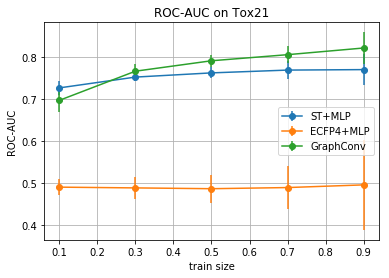

In [14]:
plt.figure(figsize=(6,4))
plt.errorbar(r, X2[:,0], yerr=X2[:,1], fmt='o-', label='ST+MLP')
plt.errorbar(r, X1[:,0], yerr=X1[:,1], fmt='o-', label='ECFP4+MLP')
plt.errorbar(r, X3[:,0], yerr=X3[:,1], fmt='o-', label='GraphConv')
plt.xlabel('train size')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC on Tox21')
plt.legend()
plt.grid()
plt.show()

In [10]:
def dict_to_arr(scores_dict):
    roc = np.empty((2,len(scores_dict)))
    for i,s in enumerate(scores_dict):
        roc[0,i] = s['roc mean']
        roc[1,i] = s['roc std']
    return roc

scores_gc = [
{'roc mean': 0.7731164873063542, 'roc std': 0.019381973618736673},
{'roc mean': 0.827707085952707, 'roc std': 0.012863222703762464},
{'roc mean': 0.8545468114846569, 'roc std': 0.013610841626666363},
{'roc mean': 0.8624702249221473, 'roc std': 0.01950053282351519},
{'roc mean': 0.8796838522160145, 'roc std': 0.029846762225770766}
]

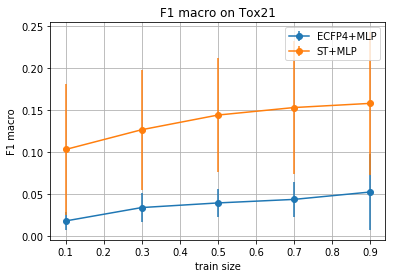

In [18]:
plt.errorbar(r, X1[:,2], yerr=X1[:,3], fmt='o-', label='ECFP4+MLP')
plt.errorbar(r, X2[:,2], yerr=X2[:,3], fmt='o-', label='ST+MLP')
plt.xlabel('train size')
plt.ylabel('F1 macro')
plt.title('F1 macro on Tox21')
plt.legend()
plt.grid()
plt.show()

In [2]:
df_sol = pd.read_csv('data/solubility.csv')
df_sol.head()

,SMILES,unknown,solubility,processed_smiles
0,O=C(C)N,60-35-5,1.58,O = C ( C ) N
1,NNC,60-34-4,1.34,N N C
2,O=C(C)O,64-19-7,1.22,O = C ( C ) O
3,N1CCCC1,123-75-1,1.15,N 1 C C C C 1
4,O=C(N)NO,127-07-1,1.12,O = C ( N ) N O


# Solubility regression

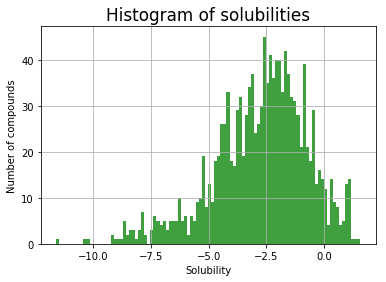

In [4]:
sol = df_sol['solubility'].values 
plt.hist(sol, 100, facecolor='green', alpha=0.75)
plt.rcParams["font.size"]=14
plt.xlabel('Solubility')
plt.ylabel('Number of compounds')
plt.title('Histogram of solubilities')
plt.grid()
plt.show()

In [5]:
def bit2np(bitvector):
    bitstring = bitvector.ToBitString()
    intmap = map(int, bitstring)
    return np.array(list(intmap))

In [6]:
def extract_morgan(df):
    smiles = df["SMILES"].values
    sol = df['solubility'].values
    N = len(smiles)
    print("{} molecules".format(N))
    X,y = [],[]
    for i in range(N):
        mol = Chem.MolFromSmiles(smiles[i])
        if mol is None:
            print(i)
            continue

        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) # Morgan (Similar to ECFP4)
        X.append(bit2np(fp))
        y.append(sol[i])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [58]:
a = Chem.MolFromSmiles('c1ccccc1 ')
print(a)

In [8]:
X_train, y_train = extract_morgan(pd.read_csv('data/sol_train.csv'))
X_test, y_test = extract_morgan(pd.read_csv('data/sol_test.csv'))
print('Train', X_train.shape)
print('Test', X_test.shape)

968 molecules
322 molecules
306
Train (968, 1024)
Test (321, 1024)


# Prediction
### Multi-layer perceptron

In [43]:
# Default
# Default
n = 10
r2 = np.zeros(n)
mse = np.zeros(n)

for i in range(n):
    MLP = MLPRegressor()
    MLP.fit(X_train, y_train)
    y_pred = MLP.predict(X_test)
    r2[i] = r2_score(y_test, y_pred)
    mse[i] = mean_squared_error(y_test, y_pred)

print("Test R2: {:.4f} ± {:.4f}".format(np.mean(r2), np.std(r2)))
print("Test MSE: {:.4f} ± {:.4f}".format(np.mean(mse), np.std(mse)))

/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

Test R2: 0.6645 ± 0.0191
Test MSE: 1.3707 ± 0.0782


In [44]:
def objective_mlp(trial):
    n_layers = trial.suggest_int('n_layers', 1,3)
    layers = []
    for i in range(n_layers):
        n_units = int(trial.suggest_loguniform('n_units_l{}'.format(i), 1, 1000))
        layers.append(n_units)
    
    n_folds = 4
    score = 0
    for _ in range(n_folds):
        mlp = MLPRegressor(hidden_layer_sizes=layers)
        X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train)
        mlp.fit(X_trn, y_trn)
        y_pred = mlp.predict(X_val)
        score += mean_squared_error(y_val, y_pred)
    return score/n_folds

study = optuna.create_study()
study.optimize(objective_mlp, n_trials=100)

[I 2019-03-27 14:22:02,951] Finished a trial resulted in value: 1.5416560371445227. Current best value is 1.5416560371445227 with parameters: {'n_layers': 3, 'n_units_l0': 322.5994329335695, 'n_units_l1': 1.6157563239137902, 'n_units_l2': 263.7478858950991}.
[I 2019-03-27 14:23:24,247] Finished a trial resulted in value: 1.346197750418836. Current best value is 1.346197750418836 with parameters: {'n_layers': 1, 'n_units_l0': 977.1515878736769}.
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/honda/anaconda3/lib/pytho

[I 2019-03-27 14:25:23,565] Finished a trial resulted in value: 1.9114989664609052. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427066, 'n_units_l2': 23.183536069461045}.
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[I 2019-03-27 14:30:36,605] Finished a trial resulted in value: 1.6438376805256016. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427066, 'n_units_l2': 23.183536069461045}.
[I 2019-03-27 14:30:48,394] Finished a trial resulted in value: 1.3098928037243194. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427066, 'n_units_l2': 23.183536069461045}.
[I 2019-03-27 14:31:05,793] Finished a trial resulted in value: 1.2534836699878529. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427

/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[I 2019-03-27 14:38:50,959] Finished a trial resulted in value: 1.5392989913051345. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427066, 'n_units_l2': 23.183536069461045}.
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2019-03-27 14:47:09,880] Finished a trial resulted in value: 1.4257486402679147. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427066, 'n_units_l2': 23.183536069461045}.
[I 2019-03-27 14:47:21,137] Finished a trial resulted in value: 1.4600071526309273. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427066, 'n_units_l2': 23.183536069461045}.
[I 2019-03-27 14:47:57,484] Finished a trial resulted in value: 1.2479667293740362. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427066, 'n_units_l2': 23.183536069461045}.
[I 2019-03-27 14:48:12,369] Finished a trial resulted in value: 1.2039598123813833. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427

/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[I 2019-03-27 15:00:57,746] Finished a trial resulted in value: 1.934418132872151. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427066, 'n_units_l2': 23.183536069461045}.
[I 2019-03-27 15:01:17,126] Finished a trial resulted in value: 1.2591149308946599. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.989472413427066, 'n_units_l2': 23.183536069461045}.
[I 2019-03-27 15:02:27,622] Finished a trial resulted in value: 1.2989809948952806. Current best value is 1.1357399039491396 with parameters: {'n_layers': 3, 'n_units_l0': 66.70075836766398, 'n_units_l1': 37.9894724134270

In [45]:
# Optimized

n = 10
r2 = np.zeros(n)
mse = np.zeros(n)

for i in range(n):
    MLP = MLPRegressor((67,38,23))
    MLP.fit(X_train, y_train)
    y_pred = MLP.predict(X_test)
    r2[i] = r2_score(y_test, y_pred)
    mse[i] = mean_squared_error(y_test, y_pred)

print("Test R2: {:.4f} ± {:.4f}".format(np.mean(r2), np.std(r2)))
print("Test MSE: {:.4f} ± {:.4f}".format(np.mean(mse), np.std(mse)))

Test R2: 0.7150 ± 0.0145
Test MSE: 1.1642 ± 0.0591


### Random Forest

In [47]:
# Default
n = 10
r2 = np.zeros(n)
mse = np.zeros(n)

for i in range(n):
    RF = RandomForestRegressor()
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    r2[i] = r2_score(y_test, y_pred)
    mse[i] = mean_squared_error(y_test, y_pred)

print("Test R2: {:.4f} ± {:.4f}".format(np.mean(r2), np.std(r2)))
print("Test MSE: {:.4f} ± {:.4f}".format(np.mean(mse), np.std(mse)))

/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/honda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/honda/anaconda3/lib/python3.6/site-package

Test R2: 0.6739 ± 0.0114
Test MSE: 1.3323 ± 0.0467


In [48]:
def objective_rf(trial):
    max_depth = int(trial.suggest_loguniform('max_depth', 2, 100))
    n_estimators = int(trial.suggest_loguniform('n_estimators', 2, 1000))
    max_features = trial.suggest_int('max_features', 1, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        
    n_folds = 4
    score = 0
    for _ in range(n_folds):
        rf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, max_features=max_features,
                              min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train)
        rf.fit(X_trn, y_trn)
        y_pred = rf.predict(X_val)
        score += mean_squared_error(y_val, y_pred)
    return score/n_folds

study = optuna.create_study()
study.optimize(objective_rf, n_trials=100)

[I 2019-03-27 15:25:32,938] Finished a trial resulted in value: 3.6833128467225267. Current best value is 3.6833128467225267 with parameters: {'max_depth': 3.7795715336911115, 'n_estimators': 265.6365220208648, 'max_features': 7, 'min_samples_split': 10, 'min_samples_leaf': 3}.
[I 2019-03-27 15:25:32,989] Finished a trial resulted in value: 3.5355280577650863. Current best value is 3.5355280577650863 with parameters: {'max_depth': 11.99603018594304, 'n_estimators': 2.842662445985372, 'max_features': 9, 'min_samples_split': 10, 'min_samples_leaf': 7}.
[I 2019-03-27 15:25:33,083] Finished a trial resulted in value: 3.3119433202926203. Current best value is 3.3119433202926203 with parameters: {'max_depth': 26.759767322751497, 'n_estimators': 11.949688228784165, 'max_features': 5, 'min_samples_split': 3, 'min_samples_leaf': 3}.
[I 2019-03-27 15:25:34,165] Finished a trial resulted in value: 2.7409493188671066. Current best value is 2.7409493188671066 with parameters: {'max_depth': 9.614334

[I 2019-03-27 15:26:07,269] Finished a trial resulted in value: 2.2608373398520536. Current best value is 1.44615179930778 with parameters: {'max_depth': 70.99966855193003, 'n_estimators': 26.037612886557305, 'max_features': 6, 'min_samples_split': 2, 'min_samples_leaf': 1}.
[I 2019-03-27 15:26:09,152] Finished a trial resulted in value: 2.991031526962796. Current best value is 1.44615179930778 with parameters: {'max_depth': 70.99966855193003, 'n_estimators': 26.037612886557305, 'max_features': 6, 'min_samples_split': 2, 'min_samples_leaf': 1}.
[I 2019-03-27 15:26:09,335] Finished a trial resulted in value: 2.833185895650168. Current best value is 1.44615179930778 with parameters: {'max_depth': 70.99966855193003, 'n_estimators': 26.037612886557305, 'max_features': 6, 'min_samples_split': 2, 'min_samples_leaf': 1}.
[I 2019-03-27 15:26:09,685] Finished a trial resulted in value: 2.4517082262063212. Current best value is 1.44615179930778 with parameters: {'max_depth': 70.99966855193003, '

In [49]:
# Optimized

n = 10
r2 = np.zeros(n)
mse = np.zeros(n)

for i in range(n):
    RF = RandomForestRegressor(max_depth=71, n_estimators=26, max_features=6,
                              min_samples_split=2, min_samples_leaf=1)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    r2[i] = r2_score(y_test, y_pred)
    mse[i] = mean_squared_error(y_test, y_pred)

print("Test R2: {:.4f} ± {:.4f}".format(np.mean(r2), np.std(r2)))
print("Test MSE: {:.4f} ± {:.4f}".format(np.mean(mse), np.std(mse)))

Test R2: 0.6391 ± 0.0087
Test MSE: 1.4744 ± 0.0355


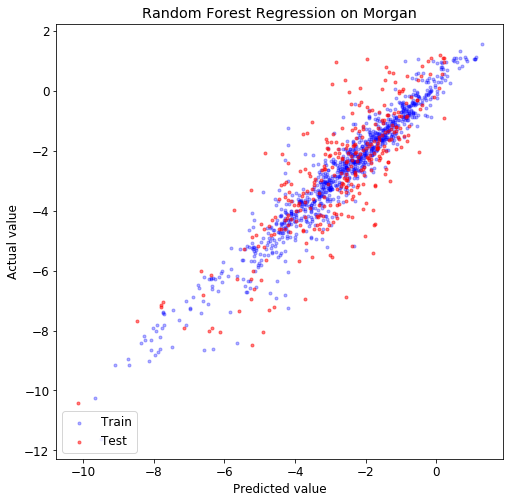

In [15]:
plt.figure(figsize=(8,8))
plt.rcParams["font.size"] = 12
plt.scatter(y_train_pred, y_train, c='blue', marker='.', alpha=0.3, label='Train')
plt.scatter(y_pred, y_test, c='red', marker='.', alpha=0.5, label='Test')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Random Forest Regression on Morgan')
plt.legend(loc='lower left')
#plt.hlines(y=0, xmin=1, xmax=7, lw=2, color='black')
plt.show()

# DeepChem

In [7]:
import os
import deepchem as dc
from deepchem.models.tensorgraph.models.graph_models import GraphConvModel

ModuleNotFoundError: No module named 'deepchem'

In [3]:
graph_featurizer = dc.feat.graph_features.ConvMolFeaturizer()
loader = dc.data.data_loader.CSVLoader( tasks=['solubility'], smiles_field="SMILES", featurizer=graph_featurizer )
trainset = loader.featurize( 'data/sol_train.csv' )
testset = loader.featurize( 'data/sol_test.csv' )

Loading raw samples now.
shard_size: 8192
About to start loading CSV from data/sol_train.csv
Loading shard 1 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 0 took 2.835 s
TIMING: dataset construction took 3.735 s
Loading dataset from disk.
Loading raw samples now.
shard_size: 8192
About to start loading CSV from data/sol_test.csv
Loading shard 1 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 0 took 0.983 s
TIMING: dataset construction took 1.225 s
Loading dataset from disk.


In [8]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
model = GraphConvModel(n_tasks=1, graph_conv_layers=[64,64], dropout=0.2, batch_size=50, mode='regression')

# Epochs
model.fit(trainset, nb_epoch=50)

/home/honda/anaconda3/envs/deepchem/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


9.210203170776367

In [7]:
metric = dc.metrics.Metric(
    dc.metrics.r2_score, np.mean, mode="regression")

print("Evaluating model")
train_scores = model.evaluate(trainset, [metric])
print("Train R2 Score: %f" % train_scores["mean-r2_score"])
test_scores = model.evaluate(testset, [metric])
print("Test R2 Score: %f" % test_scores["mean-r2_score"])

Evaluating model
computed_metrics: [0.9877486123645902]
Train R2 Score: 0.987749
computed_metrics: [0.8917750532009926]
Test R2 Score: 0.891775


In [12]:
metric = dc.metrics.Metric(
    dc.metrics.r2_score, np.mean, mode="regression")

print("Evaluating model")
train_scores = model.evaluate(trainset, [metric])
print("Train R2 Score: %f" % train_scores["mean-r2_score"])
test_scores = model.evaluate(testset, [metric])
print("Test R2 Score: %f" % test_scores["mean-r2_score"])

Evaluating model
computed_metrics: [0.973174331288795]
Train R2 Score: 0.973174
computed_metrics: [0.8845266039331535]
Test R2 Score: 0.884527


In [13]:
metric = dc.metrics.Metric(
    dc.metrics.mean_squared_error, np.mean, mode="regression")

print("Evaluating model")
train_scores = model.evaluate(trainset, [metric])
print("Train MSE: %f" % train_scores["mean-mean_squared_error"])
test_scores = model.evaluate(testset, [metric])
print("Test MSE: %f" % test_scores["mean-mean_squared_error"])

Evaluating model
computed_metrics: [0.11111642355590555]
Train MSE: 0.111116
computed_metrics: [0.47178782394475355]
Test MSE: 0.471788
